# Generador de datasets

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random 
import string
import glob, os

In [19]:
cant_palabras = 5015

def generador(filename, char, n):
    file = open(f'data/{filename}.txt', 'a')
    for _ in range(n):
        word = ''.join(random.choice(string.ascii_lowercase) for _ in range(random.randint(3, 9)))
        word = char + word
        file.write(word + '\n')
    file.close()

### Distribucion Uniforme

In [23]:
char = 'a'
sumaUni = 0
for i in range(0,26):
    generador("uniforme",char, int(cant_palabras/26) )
    char = chr(ord(char) + 1)
    sumaUni += cant_palabras/26
print(sumaUni) 

5014.999999999998


### Distribucion Normal

In [21]:
char = 'a'
suma =0 
for i in range(1,14):
    generador("normal",char, int(i*25.78))
    char = chr(ord(char) + 1)   
    suma += int(i*25.78) 
for i in range(14,1,-1):        
    generador("normal",char,int(i*25.78) )
    char = chr(ord(char) + 1)
    suma += int(i*25.78)
print(suma) 

5015


### Ploteo distribuciones

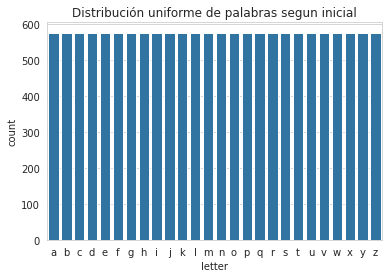

In [5]:
letter_count = {}
datasetPath = './data/uniforme.txt'

file = open(datasetPath, 'r')
for line in file:
    letter_count[line[0]] = letter_count.get(line[0],0) +1
    
df = pd.DataFrame(letter_count.items(), columns=['letter', 'count'])
df = df.sort_values(["letter"])
df.head()

sns.set_style("whitegrid")
ax = sns.barplot(data=df,x='letter', y='count', color="tab:blue")
ax.set_title("Distribución uniforme de palabras segun inicial")
fig = ax.get_figure()

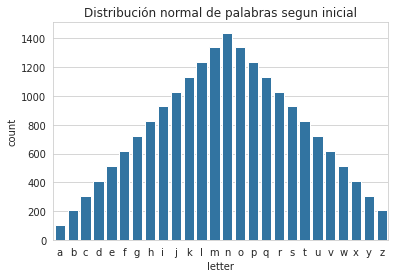

In [6]:
letter_count = {}
datasetPath = './data/normal.txt'

file = open(datasetPath, 'r')
for line in file:
    letter_count[line[0]] = letter_count.get(line[0],0) +1
    
df = pd.DataFrame(letter_count.items(), columns=['letter', 'count'])
df = df.sort_values(["letter"])
df.head()

sns.set_style("whitegrid")
ax = sns.barplot(data=df,x='letter', y='count', color="tab:blue")
ax.set_title("Distribución normal de palabras segun inicial")
fig = ax.get_figure()

### Distribucion uniforme incremental en tamaño

In [24]:
cantArchivos = 30
cantPalabras = 150
for i in range(0,cantArchivos):
    char = 'a'
    sumaUni = 0
    for j in range(0,26):
        generador("incremental/uniforme"+str(i),char, int(cantPalabras/26) )
        char = chr(ord(char) + 1)
        sumaUni += cantPalabras/26
#print(sumaUni) 